In [1]:
!pip install -q opendatasets

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: asamanikafalen
Your Kaggle Key: ··········


100%|██████████| 41.7M/41.7M [00:00<00:00, 65.6MB/s]


In [3]:
import os
directory = '/content/genre-classification-dataset-imdb'
contents= os.listdir(directory)
print(contents)

['Genre Classification Dataset']


In [7]:
import pandas as pd
import numpy as np
train_data=pd.read_csv('/content/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt',delimiter=':::',header=None,engine='python')
test_data=pd.read_csv('/content/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt',delimiter=':::',header=None,engine='python')
test_solution=pd.read_csv('/content/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt',delimiter=":::",header=None,engine='python')


In [8]:
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
train_data.shape

(54214, 4)

In [10]:
test_data.head()

,0,1,2
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [11]:
test_solution.shape

(54200, 4)

In [12]:
test_solution.head()

,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [13]:
data=pd.concat((train_data,test_solution))
data.columns=["MovieID","MovieName","Genre","Description"]
data.head()

,MovieID,MovieName,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [14]:
data.shape

(108414, 4)

In [17]:
import nltk
import os
custom_download_path = '/kaggle/working/nltk_data'
os.makedirs(custom_download_path, exist_ok=True)
nltk.data.path.append(custom_download_path)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [19]:
stopword = set(stopwords.words('english'))
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[#@\$]', '', text)
    tokens = word_tokenize(text)
    lemmatizer  = WordNetLemmatizer()
    text = text.split()
    text = [word for word in text if word not in stopword]
    return " ".join(text)

In [20]:
data["Description_clean"] =  data["Description"].apply(preprocessing)

In [21]:
data.head()

,MovieID,MovieName,Genre,Description,Description_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [24]:
data = data.drop(["MovieName","MovieID"] , axis = 1)
data.head()

,Genre,Description,Description_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [ ]:
import re
with open(test_solution, 'r', encoding='utf-8') as file:
    lines = file.readlines()
genre_pattern = re.compile(r'::: (\w+) :::')
y_test = [re.search(genre_pattern, line).group(1) if re.search(genre_pattern, line) else 'UNKNOWN' for line in lines]
print(y_test)

['thriller', 'comedy', 'documentary', 'drama', 'drama', 'horror', 'drama', 'comedy', 'documentary', 'drama', 'drama', 'drama', 'drama', 'drama', 'short', 'documentary', 'comedy', 'western', 'documentary', 'documentary', 'short', 'drama', 'documentary', 'documentary', 'documentary', 'documentary', 'drama', 'family', 'sport', 'horror', 'western', 'drama', 'documentary', 'comedy', 'drama', 'documentary', 'drama', 'romance', 'war', 'drama', 'short', 'UNKNOWN', 'short', 'documentary', 'documentary', 'documentary', 'comedy', 'comedy', 'drama', 'documentary', 'drama', 'drama', 'comedy', 'horror', 'biography', 'documentary', 'drama', 'adult', 'comedy', 'documentary', 'short', 'drama', 'drama', 'drama', 'drama', 'UNKNOWN', 'family', 'documentary', 'comedy', 'comedy', 'documentary', 'drama', 'drama', 'drama', 'short', 'documentary', 'horror', 'drama', 'comedy', 'documentary', 'documentary', 'horror', 'documentary', 'drama', 'comedy', 'horror', 'action', 'documentary', 'documentary', 'action', 'd

In [28]:
x = data["Description_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [29]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

Model Score on Training data 0.6393454719870127
Model Score on Testing data 0.5246923829025771


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.04      0.60      0.07        85
       adult        0.03      0.68      0.05        25
   adventure        0.06      0.59      0.10        74
   animation        0.00      0.00      0.00         3
   biography        0.00      0.00      0.00         0
      comedy        0.45      0.53      0.49      6208
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.57      0.69     20833
       drama        0.83      0.46      0.59     24525
      family        0.00      0.50      0.00         2
     fantasy        0.00      0.00      0.00         0
   game-show        0.18      0.97      0.31        33
     history        0.00      0.00      0.00         0
      horror        0.29      0.77      0.42       811
       music        0.04      0.89      0.08        35
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         1
        n

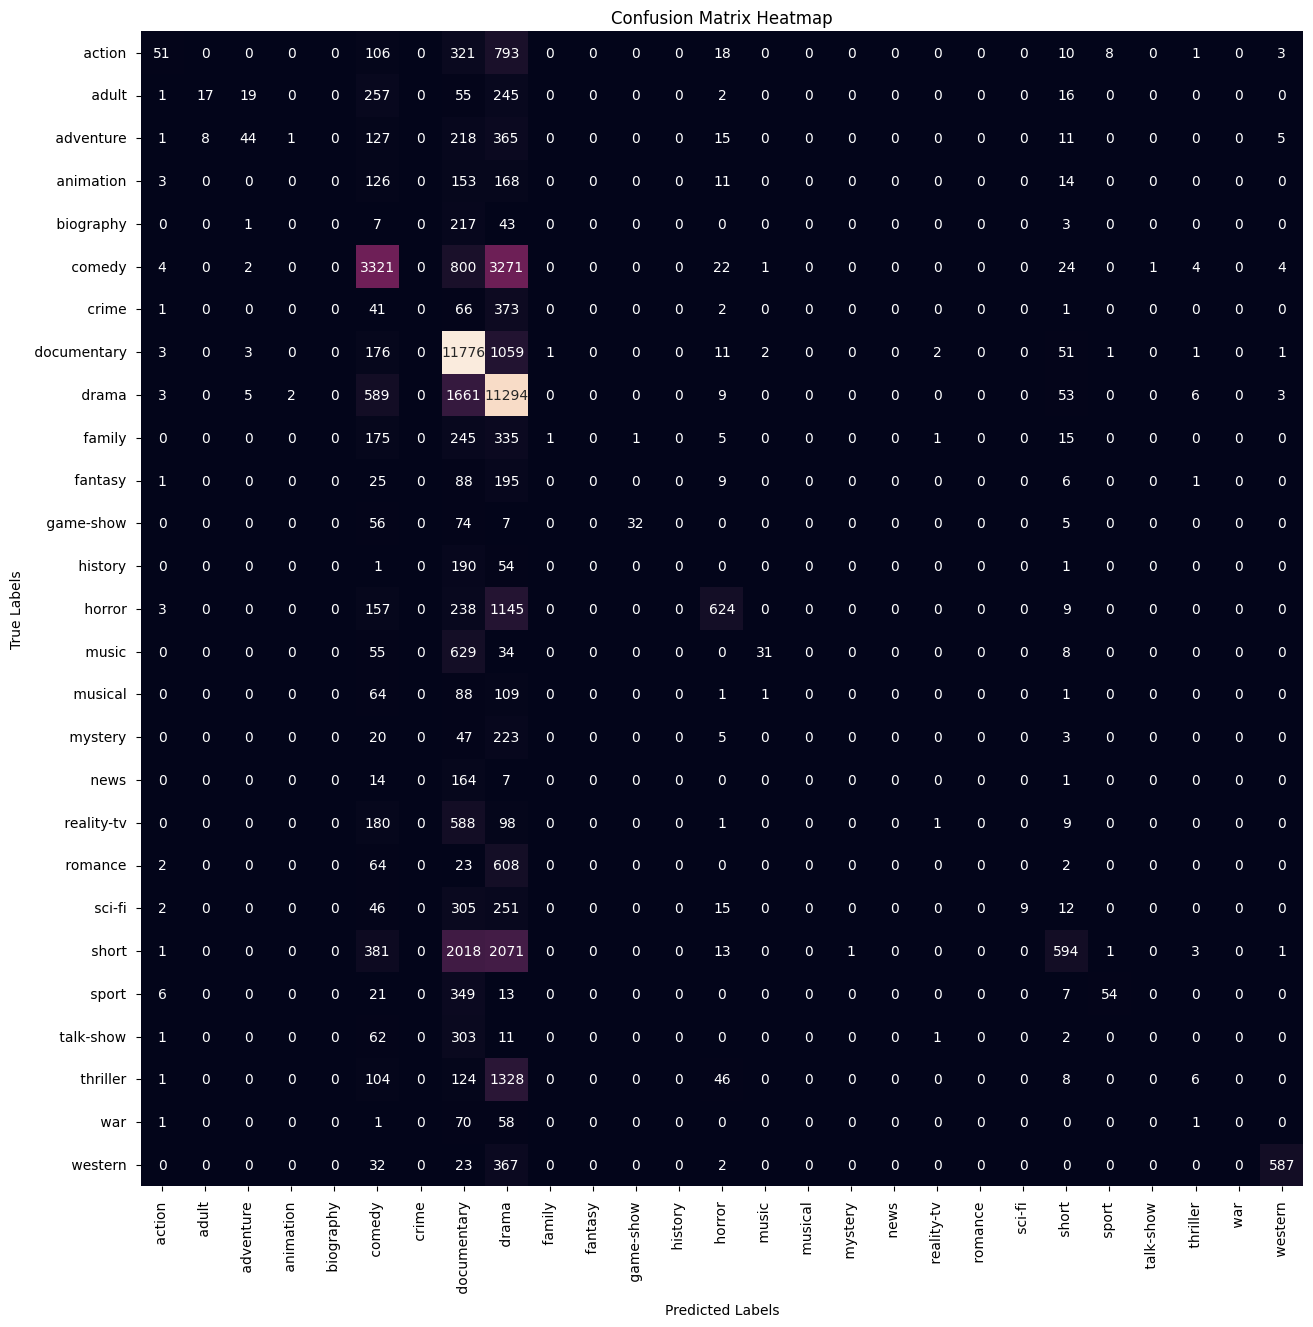

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
#MultinomialNaiveBayes
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Testing data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)

print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [39]:
#LogisticRegression
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Testing data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.9971405906986183
Model Score on Testing data 0.5678048960466361
               precision    recall  f1-score   support

      action        0.33      0.42      0.37      1029
       adult        0.38      0.62      0.47       372
   adventure        0.24      0.49      0.32       399
   animation        0.16      0.35      0.22       216
   biography        0.00      0.00      0.00        32
      comedy        0.58      0.53      0.55      8237
       crime        0.10      0.21      0.13       223
 documentary        0.79      0.71      0.75     14636
       drama        0.68      0.56      0.61     16436
      family        0.16      0.33      0.22       382
     fantasy        0.08      0.28      0.13        96
   game-show        0.58      0.74      0.65       136
     history        0.03      0.16      0.05        51
      horror        0.59      0.62      0.61      2071
       music        0.51      0.65      0.57       590
     musical        0.14

In [40]:
#LinearSupportVectorClassifier
svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Testing data",svm.score(x_test1 ,y_test))
y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score on Training data 0.9995572527533344
Model Score on Testing data 0.5180511742025937
               precision    recall  f1-score   support

      action        0.29      0.32      0.31      1184
       adult        0.39      0.50      0.44       474
   adventure        0.24      0.34      0.28       562
   animation        0.17      0.27      0.21       293
   biography        0.01      0.02      0.02       124
      comedy        0.52      0.49      0.51      7879
       crime        0.10      0.13      0.12       374
 documentary        0.73      0.69      0.71     13773
       drama        0.60      0.53      0.56     15235
      family        0.16      0.23      0.19       545
     fantasy        0.11      0.17      0.13       205
   game-show        0.60      0.67      0.63       155
     history        0.05      0.11      0.07       115
      horror        0.56      0.55      0.55      2220
       music        0.47      0.57      0.52       621
     musical        0.12

In [36]:
#RandomForest
random_forest = RandomForestClassifier()
random_forest.fit(x_train1, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train1, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test1, y_test))
y_pred = random_forest.predict(x_test1)
print(classification_report(y_pred ,y_test))

Random Forest - Train Score: 0.9995572527533344
Random Forest - Test Score: 0.48973379821794233


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.01      0.61      0.02        18
       adult        0.05      0.67      0.10        49
   adventure        0.10      0.76      0.18       109
   animation        0.00      0.33      0.01         6
   biography        0.00      0.00      0.00         0
      comedy        0.27      0.56      0.36      3565
       crime        0.01      1.00      0.01         3
 documentary        0.88      0.56      0.69     20599
       drama        0.86      0.41      0.55     28388
      family        0.02      0.71      0.04        21
     fantasy        0.00      0.00      0.00         0
   game-show        0.43      0.89      0.58        83
     history        0.00      0.00      0.00         0
      horror        0.12      0.78      0.21       330
       music        0.06      0.90      0.11        51
     musical        0.02      1.00      0.04         6
     mystery        0.00      1.00      0.01         1
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
